In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading inputs from the files
calc_train = pd.read_csv('kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')
calc_test = pd.read_csv('kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv')
mass_train = pd.read_csv('kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')
mass_test = pd.read_csv('kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv')
dicom_df = pd.read_csv('kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')

In [3]:
# checking the dataset
calc_train.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [4]:
# choosing the columns to drop which are not required for our text-based model
col=['patient_id', 'image file path', 'cropped image file path', 'ROI mask file path']

In [5]:
# dropping the chosen columns
calc_train= calc_train.drop(
    columns=col
)

In [6]:
calc_train.head()

,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety
0,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3
1,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3
2,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4
3,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4
4,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3


In [7]:
# checking the unique entries in the data and also if there are any null entries
print(calc_train['pathology'].value_counts())
print(calc_train['pathology'].isna().sum())

pathology
MALIGNANT                  544
BENIGN                     528
BENIGN_WITHOUT_CALLBACK    474
Name: count, dtype: int64
0


In [8]:
# now we need to map the entries to numerical values
calc_train['pathology'] = calc_train['pathology'].map({
    'MALIGNANT': 1,
    'BENIGN': 0,
    'BENIGN_WITHOUT_CALLBACK': 0
})
calc_train.head()

,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety
0,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,1,3
1,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,1,3
2,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,0,4
3,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,0,4
4,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,0,3


In [9]:
# repeating the above process for other attributes as well
print(calc_train['left or right breast'].value_counts())
print(calc_train['left or right breast'].isna().sum())

left or right breast
LEFT     818
RIGHT    728
Name: count, dtype: int64
0


In [10]:
calc_train['left or right breast'] = calc_train['left or right breast'].map({
    'LEFT': 1,
    'RIGHT': 0,
})

In [11]:
print(calc_train['image view'].value_counts())
print(calc_train['image view'].isna().sum())

image view
MLO    807
CC     739
Name: count, dtype: int64
0


In [12]:
calc_train['image view'] = calc_train['image view'].map({
    'CC': 1,
    'MLO': 0,
})

In [13]:
print(calc_train['abnormality type'].value_counts())
print(calc_train['abnormality type'].isna().sum())

abnormality type
calcification    1546
Name: count, dtype: int64
0


In [14]:
# Now, our data has mainly two categories -> calcification and mass
# We are defining 1 for calcification and 0 for mass in abnormality type
calc_train['abnormality type']=calc_train['abnormality type'].map({'calcification':1})

In [15]:
print(calc_train['calc type'].value_counts())
print(calc_train['calc type'].isna().sum())

calc type
PLEOMORPHIC                                                 664
AMORPHOUS                                                   138
PUNCTATE                                                    106
LUCENT_CENTER                                                93
VASCULAR                                                     82
FINE_LINEAR_BRANCHING                                        77
COARSE                                                       35
ROUND_AND_REGULAR-LUCENT_CENTER                              31
PLEOMORPHIC-FINE_LINEAR_BRANCHING                            28
ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE                     24
ROUND_AND_REGULAR-EGGSHELL                                   23
PUNCTATE-PLEOMORPHIC                                         21
DYSTROPHIC                                                   20
LUCENT_CENTERED                                              18
ROUND_AND_REGULAR                                            17
ROUND_AND_REGULAR-LUCENT_CENTE

In [16]:
print(calc_train['calc distribution'].value_counts())
print(calc_train['calc distribution'].isna().sum())

calc distribution
CLUSTERED              740
SEGMENTAL              168
REGIONAL                99
LINEAR                  90
DIFFUSELY_SCATTERED     37
CLUSTERED-LINEAR        25
CLUSTERED-SEGMENTAL      5
LINEAR-SEGMENTAL         5
REGIONAL-REGIONAL        1
Name: count, dtype: int64
376


In [17]:
# now upon inspecting our data we realized that the calc_type and calc_distrubution have composite entries that is
# there are many entries that are combination of other entreis
# so the best choice for us was to split the entries based on the separator and then create binary columns for each
# entry (apply One Hot Encoding (OHE))
calc_types = calc_train['calc type'].str.get_dummies(sep='-')
calc_distributions = calc_train['calc distribution'].str.get_dummies(sep='-')

In [18]:
# merging the new entries back in the df and dropping the old ones
calc_train = pd.concat([calc_train, calc_types, calc_distributions], axis=1)
calc_train.drop(columns=['calc type', 'calc distribution'], inplace=True)
print(calc_train.head())

   breast density  left or right breast  image view  abnormality id  \
0               3                     0           1               1   
1               3                     0           0               1   
2               4                     1           1               1   
3               4                     1           0               1   
4               1                     1           1               1   

   abnormality type  assessment  pathology  subtlety  AMORPHOUS  COARSE  ...  \
0                 1           3          1         3          1       0  ...   
1                 1           3          1         3          1       0  ...   
2                 1           4          0         4          0       0  ...   
3                 1           4          0         4          0       0  ...   
4                 1           2          0         3          0       0  ...   

   PLEOMORPHIC  PUNCTATE  ROUND_AND_REGULAR  SKIN  VASCULAR  CLUSTERED  \
0            0    

In [19]:
calc_train.head()

,breast density,left or right breast,image view,abnormality id,abnormality type,assessment,pathology,subtlety,AMORPHOUS,COARSE,...,PLEOMORPHIC,PUNCTATE,ROUND_AND_REGULAR,SKIN,VASCULAR,CLUSTERED,DIFFUSELY_SCATTERED,LINEAR,REGIONAL,SEGMENTAL
0,3,0,1,1,1,3,1,3,1,0,...,0,0,0,0,0,1,0,0,0,0
1,3,0,0,1,1,3,1,3,1,0,...,0,0,0,0,0,1,0,0,0,0
2,4,1,1,1,1,4,0,4,0,0,...,1,0,0,0,0,0,0,1,0,0
3,4,1,0,1,1,4,0,4,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,1,1,1,1,2,0,3,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
# now performing similar steps for our mass_train file
mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [21]:
mass_train = mass_train.drop(columns=col)

In [22]:
print(mass_train['left or right breast'].value_counts())
print(mass_train['left or right breast'].isna().sum())

left or right breast
RIGHT    687
LEFT     631
Name: count, dtype: int64
0


In [23]:
print(mass_train['image view'].value_counts())
print(mass_train['image view'].isna().sum())

image view
MLO    711
CC     607
Name: count, dtype: int64
0


In [24]:
print(mass_train['abnormality type'].value_counts())
print(mass_train['abnormality type'].isna().sum())

abnormality type
mass    1318
Name: count, dtype: int64
0


In [25]:
print(mass_train['pathology'].value_counts())
print(mass_train['pathology'].isna().sum())

pathology
MALIGNANT                  637
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
Name: count, dtype: int64
0


In [26]:
mass_train['left or right breast'] = mass_train['left or right breast'].map({
    'LEFT': 1,
    'RIGHT': 0,
})

mass_train['pathology'] = mass_train['pathology'].map({
    'MALIGNANT': 1,
    'BENIGN': 0,
    'BENIGN_WITHOUT_CALLBACK': 0
})

mass_train['abnormality type']=mass_train['abnormality type'].map({'mass':0})

In [27]:
print(mass_train['mass margins'].value_counts())
print(mass_train['mass margins'].isna().sum())

mass margins
CIRCUMSCRIBED                            305
SPICULATED                               281
ILL_DEFINED                              278
OBSCURED                                 197
MICROLOBULATED                           108
CIRCUMSCRIBED-ILL_DEFINED                 27
ILL_DEFINED-SPICULATED                    25
OBSCURED-ILL_DEFINED                      19
CIRCUMSCRIBED-OBSCURED                    19
OBSCURED-SPICULATED                        4
OBSCURED-ILL_DEFINED-SPICULATED            4
MICROLOBULATED-ILL_DEFINED                 3
MICROLOBULATED-SPICULATED                  2
MICROLOBULATED-ILL_DEFINED-SPICULATED      2
CIRCUMSCRIBED-MICROLOBULATED               1
Name: count, dtype: int64
43


In [28]:
mass_train['image view'] = mass_train['image view'].map({
    'CC': 1,
    'MLO': 0,
})

In [29]:
print(mass_train['mass shape'].value_counts())
print(mass_train['mass shape'].isna().sum())

mass shape
IRREGULAR                                   351
OVAL                                        321
LOBULATED                                   305
ROUND                                       123
ARCHITECTURAL_DISTORTION                     80
IRREGULAR-ARCHITECTURAL_DISTORTION           45
LYMPH_NODE                                   26
ASYMMETRIC_BREAST_TISSUE                     20
FOCAL_ASYMMETRIC_DENSITY                     19
OVAL-LYMPH_NODE                               6
LOBULATED-IRREGULAR                           5
LOBULATED-LYMPH_NODE                          3
ROUND-OVAL                                    3
LOBULATED-ARCHITECTURAL_DISTORTION            2
IRREGULAR-FOCAL_ASYMMETRIC_DENSITY            2
LOBULATED-OVAL                                1
ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION      1
ROUND-LOBULATED                               1
Name: count, dtype: int64
4


In [30]:
mass_shape_encoded = mass_train['mass shape'].str.get_dummies(sep='-')
mass_margins_encoded = mass_train['mass margins'].str.get_dummies(sep='-')

mass_train = pd.concat([mass_train, mass_shape_encoded, mass_margins_encoded], axis=1)
mass_train.drop(columns=['mass shape','mass margins'], inplace=True)

In [31]:
mass_train.head()

,breast_density,left or right breast,image view,abnormality id,abnormality type,assessment,pathology,subtlety,ARCHITECTURAL_DISTORTION,ASYMMETRIC_BREAST_TISSUE,...,IRREGULAR,LOBULATED,LYMPH_NODE,OVAL,ROUND,CIRCUMSCRIBED,ILL_DEFINED,MICROLOBULATED,OBSCURED,SPICULATED
0,3,1,1,1,0,4,1,4,1,0,...,1,0,0,0,0,0,0,0,0,1
1,3,1,0,1,0,4,1,4,1,0,...,1,0,0,0,0,0,0,0,0,1
2,3,1,1,1,0,4,0,3,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3,1,0,1,0,4,0,3,1,0,...,0,0,0,0,0,0,1,0,0,0
4,3,0,0,1,0,4,0,5,0,0,...,0,0,0,1,0,1,0,0,0,0


In [32]:
# repeating for calc_test and mass_test
calc_test=calc_test.drop(columns=col)
calc_test['image view'] = calc_test['image view'].map({
    'CC': 1,
    'MLO': 0,
})

calc_test['abnormality type']=calc_test['abnormality type'].map({'calcification':1})

calc_test['left or right breast'] = calc_test['left or right breast'].map({
    'LEFT': 1,
    'RIGHT': 0,
})

calc_test['pathology'] = calc_test['pathology'].map({
    'MALIGNANT': 1,
    'BENIGN': 0,
    'BENIGN_WITHOUT_CALLBACK': 0
})

calc_types2 = calc_test['calc type'].str.get_dummies(sep='-')
calc_distributions2 = calc_test['calc distribution'].str.get_dummies(sep='-')

calc_test = pd.concat([calc_test, calc_types2, calc_distributions2], axis=1)
calc_test.drop(columns=['calc type', 'calc distribution'], inplace=True)
calc_test.head()

,breast density,left or right breast,image view,abnormality id,abnormality type,assessment,pathology,subtlety,AMORPHOUS,COARSE,...,PLEOMORPHIC,PUNCTATE,ROUND_AND_REGULAR,SKIN,VASCULAR,CLUSTERED,DIFFUSELY_SCATTERED,LINEAR,REGIONAL,SEGMENTAL
0,2,1,1,1,1,4,0,2,0,0,...,1,1,0,0,0,1,0,0,0,0
1,2,1,0,1,1,4,0,2,0,0,...,1,1,0,0,0,1,0,0,0,0
2,2,0,1,1,1,2,0,5,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2,0,1,2,1,2,0,5,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,1,1,2,0,5,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
mass_test=mass_test.drop(columns=col)
mass_test['image view'] = mass_test['image view'].map({
    'CC': 1,
    'MLO': 0,
})

mass_test['abnormality type']=mass_test['abnormality type'].map({'mass':0})

mass_test['left or right breast'] = mass_test['left or right breast'].map({
    'LEFT': 1,
    'RIGHT': 0,
})

mass_test['pathology'] = mass_test['pathology'].map({
    'MALIGNANT': 1,
    'BENIGN': 0,
    'BENIGN_WITHOUT_CALLBACK': 0
})

mass_margins_encoded = mass_test['mass margins'].str.get_dummies(sep='-')
mass_test = pd.concat([mass_test, mass_margins_encoded], axis=1)
mass_test.drop(columns=['mass margins'], inplace=True)

In [36]:
mass_test

,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,assessment,pathology,subtlety,CIRCUMSCRIBED,ILL_DEFINED,MICROLOBULATED,OBSCURED,SPICULATED
0,4,1,1,1,0,IRREGULAR,5,1,5,0,0,0,0,1
1,4,1,0,1,0,IRREGULAR,5,1,5,0,0,0,0,1
2,2,1,1,1,0,ROUND,4,1,4,1,0,0,0,0
3,2,1,0,1,0,ROUND,4,1,4,0,1,0,0,0
4,3,0,1,1,0,ROUND,0,0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,2,0,0,1,0,LOBULATED,3,0,3,0,0,1,0,0
374,2,0,0,1,0,IRREGULAR,5,1,5,0,1,0,0,0
375,2,1,0,1,0,IRREGULAR,4,1,2,0,1,0,0,0
376,3,0,1,1,0,IRREGULAR,5,1,4,0,0,0,0,1


In [37]:
mass_shape_encoded = mass_test['mass shape'].str.get_dummies(sep='-')
mass_test = pd.concat([mass_test, mass_shape_encoded], axis=1)
mass_test.drop(columns=['mass shape'], inplace=True)

In [38]:
mass_test

,breast_density,left or right breast,image view,abnormality id,abnormality type,assessment,pathology,subtlety,CIRCUMSCRIBED,ILL_DEFINED,...,OBSCURED,SPICULATED,ARCHITECTURAL_DISTORTION,ASYMMETRIC_BREAST_TISSUE,FOCAL_ASYMMETRIC_DENSITY,IRREGULAR,LOBULATED,LYMPH_NODE,OVAL,ROUND
0,4,1,1,1,0,5,1,5,0,0,...,0,1,0,0,0,1,0,0,0,0
1,4,1,0,1,0,5,1,5,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2,1,1,1,0,4,1,4,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2,1,0,1,0,4,1,4,0,1,...,0,0,0,0,0,0,0,0,0,1
4,3,0,1,1,0,0,0,2,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,2,0,0,1,0,3,0,3,0,0,...,0,0,0,0,0,0,1,0,0,0
374,2,0,0,1,0,5,1,5,0,1,...,0,0,0,0,0,1,0,0,0,0
375,2,1,0,1,0,4,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
376,3,0,1,1,0,5,1,4,0,0,...,0,1,0,0,0,1,0,0,0,0


In [39]:
calc_test

,breast density,left or right breast,image view,abnormality id,abnormality type,assessment,pathology,subtlety,AMORPHOUS,COARSE,...,PLEOMORPHIC,PUNCTATE,ROUND_AND_REGULAR,SKIN,VASCULAR,CLUSTERED,DIFFUSELY_SCATTERED,LINEAR,REGIONAL,SEGMENTAL
0,2,1,1,1,1,4,0,2,0,0,...,1,1,0,0,0,1,0,0,0,0
1,2,1,0,1,1,4,0,2,0,0,...,1,1,0,0,0,1,0,0,0,0
2,2,0,1,1,1,2,0,5,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2,0,1,2,1,2,0,5,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,1,1,2,0,5,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2,0,0,1,1,0,1,4,0,0,...,0,0,0,0,0,1,0,0,0,0
322,4,0,1,1,1,0,0,3,0,0,...,0,1,0,0,0,1,0,0,0,0
323,4,0,0,1,1,0,0,3,0,0,...,0,1,0,0,0,1,0,0,0,0
324,3,0,1,1,1,0,1,3,0,0,...,1,0,0,0,0,1,0,0,0,0


In [43]:
# upon inspection we realize that there would have been some entries in calc_train that were not present in the 
# calc_test which results a change in their dimensions due to OHE. Thus we also need to handle the missing columns.

In [46]:
# Get column sets for both DataFrames
train_columns = set(mass_train.columns)
test_columns = set(mass_test.columns)

# Find columns that are in one DataFrame but not the other
missing_in_train = test_columns - train_columns
missing_in_test = train_columns - test_columns

print("Columns present in mass_Test but missing in mass_Train:", missing_in_train)
print("Columns present in mass_Train but missing in mass_Test:", missing_in_test)

Columns present in mass_Test but missing in mass_Train: set()
Columns present in mass_Train but missing in mass_Test: set()


In [50]:
# Get column sets for both DataFrames
train_columns = set(calc_train.columns)
test_columns = set(calc_test.columns)

# Find columns that are in one DataFrame but not the other
missing_in_train = test_columns - train_columns
missing_in_test = train_columns - test_columns

print("Columns present in calc_Test but missing in calc_Train:", missing_in_train)
print("Columns present in calc_Train but missing in calc_Test:", missing_in_test)

Columns present in calc_Test but missing in calc_Train: set()
Columns present in calc_Train but missing in calc_Test: {'DYSTROPHIC', 'LARGE_RODLIKE', 'LUCENT_CENTERED', 'MILK_OF_CALCIUM'}


In [54]:
# adding the missing columns with value set to 0
calc_test[list(missing_in_test)] = 0

In [59]:
# now we need to merge the calcification and mass columns
# due to unavailability of some columns in the test set, it was preferred to merge them and select randomly
merged_mass = pd.concat([mass_train, mass_test], ignore_index=True)
merged_calc = pd.concat([calc_train, calc_test], ignore_index=True)

In [86]:
# trying on total merged data 
backup_merged_calc= merged_calc  
merged_calc['breast_density'] = merged_calc['breast density'] 
merged_calc = merged_calc.drop(columns = ['breast density'])

In [97]:
total_merged = pd.concat([merged_calc, merged_mass], axis = 0).fillna(0)

In [98]:
total_merged

,left or right breast,image view,abnormality id,abnormality type,assessment,pathology,subtlety,AMORPHOUS,COARSE,DYSTROPHIC,...,IRREGULAR,LOBULATED,LYMPH_NODE,OVAL,ROUND,CIRCUMSCRIBED,ILL_DEFINED,MICROLOBULATED,OBSCURED,SPICULATED
0,0,1,1,1,3,1,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,1,3,1,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,4,0,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,1,1,4,0,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,1,2,0,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,0,0,1,0,3,0,3,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1692,0,0,1,0,5,1,5,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1693,1,0,1,0,4,1,2,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1694,0,1,1,0,5,1,4,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
# now evaluating the model on this data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

X = total_merged.drop(columns=['pathology']) 
y = total_merged['pathology']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('Accuracy of Random Forest: ', accuracy_score(y_test, y_pred))
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred))
print('Random Forest Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy of Random Forest:  0.8085901027077498
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       611
           1       0.80      0.74      0.77       460

    accuracy                           0.81      1071
   macro avg       0.81      0.80      0.80      1071
weighted avg       0.81      0.81      0.81      1071

Random Forest Confusion Matrix: 
 [[525  86]
 [119 341]]


In [118]:
# evaluating on XGBoost
import xgboost as xgb
xgb = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42) 
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Accuracy of XGBoost: ', accuracy_score(y_test, y_pred))
print('XGBoost Classification Report:\n', classification_report(y_test, y_pred))
print('XGBoost Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy of XGBoost:  0.8151260504201681
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       611
           1       0.82      0.73      0.77       460

    accuracy                           0.82      1071
   macro avg       0.82      0.80      0.81      1071
weighted avg       0.82      0.82      0.81      1071

XGBoost Confusion Matrix: 
 [[537  74]
 [124 336]]


In [108]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='f1_macro',  
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search_rf.fit(X_train, y_train)

best_rf = random_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)

print("Best Parameters:", random_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced'}
Accuracy: 0.8141923436041083
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       611
           1       0.78      0.78      0.78       460

    accuracy                           0.81      1071
   macro avg       0.81      0.81      0.81      1071
weighted avg       0.81      0.81      0.81      1071

Confusion Matrix:
 [[512  99]
 [100 360]]


In [123]:
# for xgboost
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1, 2],
    'scale_pos_weight': [1, 2, 3]  
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}
Accuracy: 0.8338001867413632
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.86       611
           1       0.87      0.72      0.79       460

    accuracy                           0.83      1071
   macro avg       0.84      0.82      0.83      1071
weighted avg       0.84      0.83      0.83      1071

Confusion Matrix:
 [[560  51]
 [127 333]]


In [124]:
# plotting some important metrics

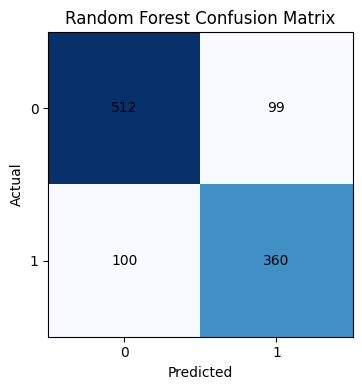

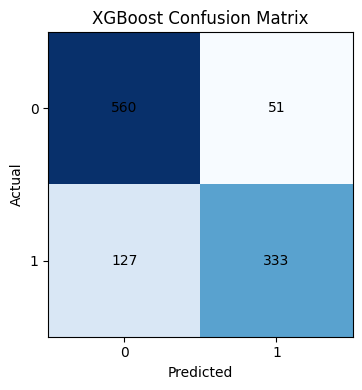

In [126]:
def plot_confusion_heatmap(cm, title):
    fig, ax = plt.subplots(figsize=(6, 4))
    im = ax.imshow(cm, cmap='Blues')

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

    ax.set_xticks(np.arange(cm.shape[1]))
    ax.set_yticks(np.arange(cm.shape[0]))
    ax.set_xticklabels(np.unique(y_test))
    ax.set_yticklabels(np.unique(y_test))

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()

# Confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred)

# Plot
plot_confusion_heatmap(cm_rf, 'Random Forest Confusion Matrix')
plot_confusion_heatmap(cm_xgb, 'XGBoost Confusion Matrix')


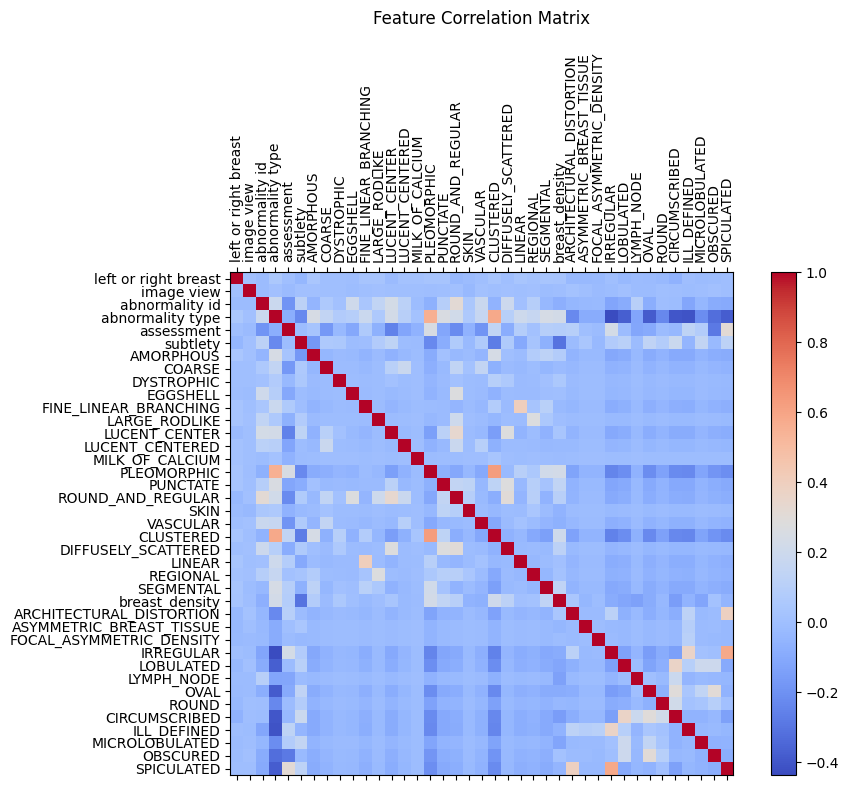

In [128]:
corr = X.corr().values
labels = X.columns

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels)

plt.title('Feature Correlation Matrix', pad=20)
plt.tight_layout()
plt.show()


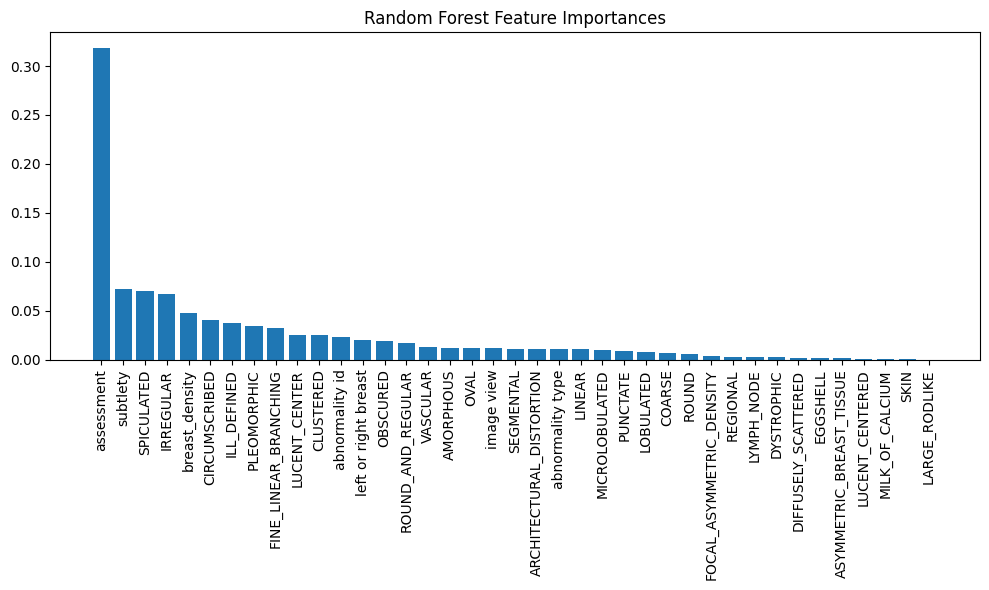

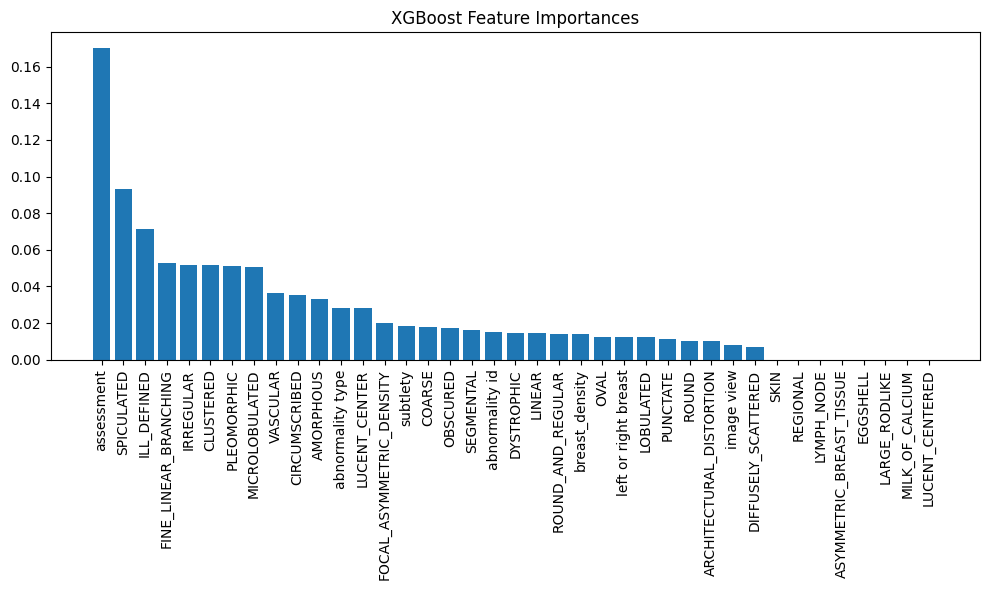

In [129]:
# plotting feature importance for random forest
importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title('Random Forest Feature Importances')
plt.bar(range(len(importances_rf)), importances_rf[indices_rf], align='center')
plt.xticks(range(len(importances_rf)), features[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

# plotting feature importance for xgboost
importances_xgb = best_xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

plt.figure(figsize=(10, 6))
plt.title('XGBoost Feature Importances')
plt.bar(range(len(importances_xgb)), importances_xgb[indices_xgb], align='center')
plt.xticks(range(len(importances_xgb)), features[indices_xgb], rotation=90)
plt.tight_layout()
plt.show()


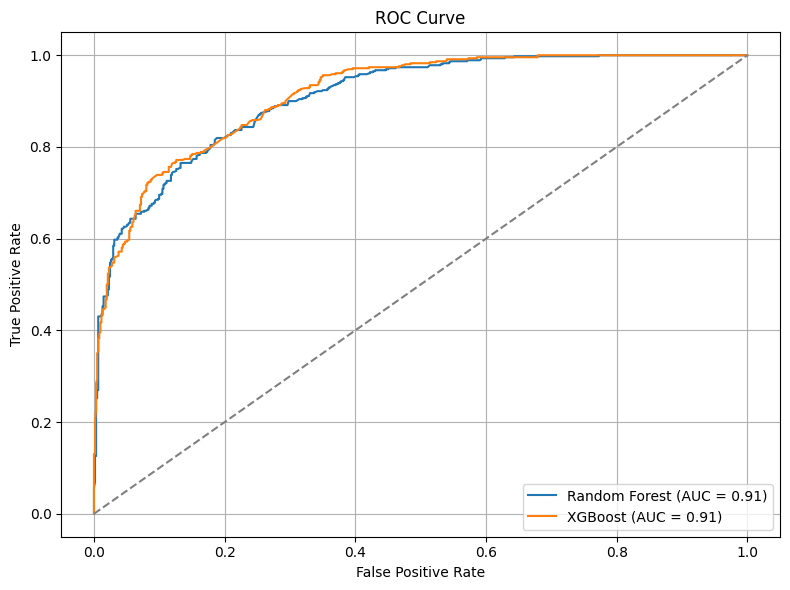

In [130]:
# plotting the ROC curve
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_score_rf = best_rf.predict_proba(X_test)[:, 1]
y_score_xgb = best_xgb.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc(fpr_xgb, tpr_xgb):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


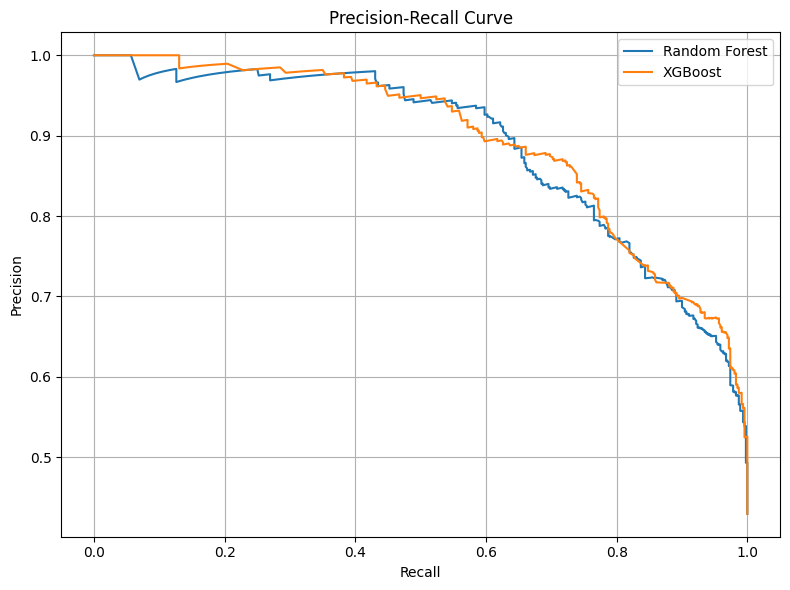

In [131]:
# plotting precision recall curve
from sklearn.metrics import precision_recall_curve

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_score_rf)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_score_xgb)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


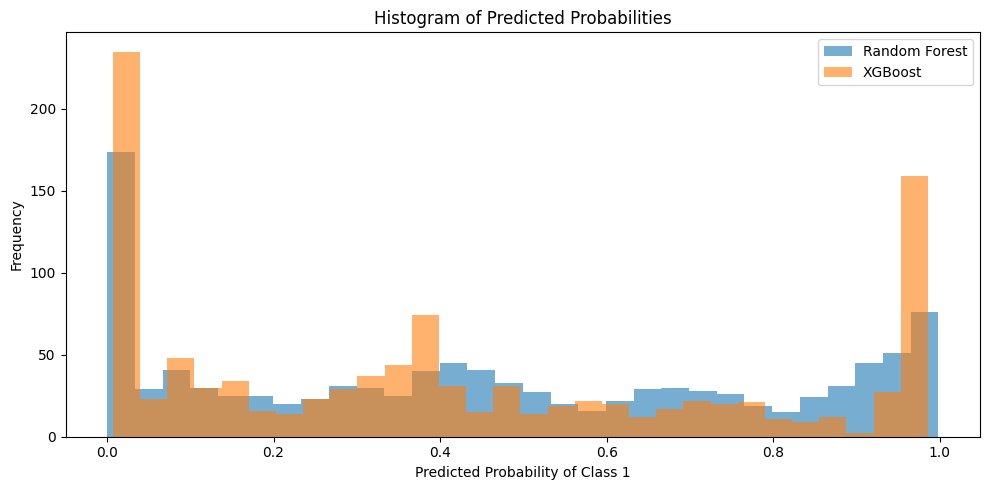

In [132]:
# histogram of predicted probabilities
plt.figure(figsize=(10, 5))
plt.hist(y_score_rf, bins=30, alpha=0.6, label='Random Forest')
plt.hist(y_score_xgb, bins=30, alpha=0.6, label='XGBoost')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

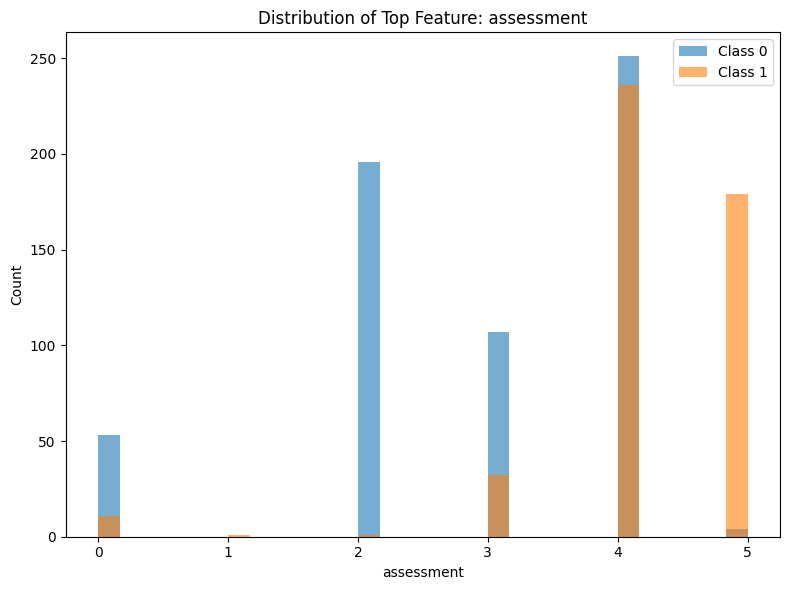

In [133]:
# distribution of imp features by class
top_feature = features[indices_rf[0]]

plt.figure(figsize=(8, 6))
plt.hist(X_test[y_test == 0][top_feature], bins=30, alpha=0.6, label='Class 0')
plt.hist(X_test[y_test == 1][top_feature], bins=30, alpha=0.6, label='Class 1')
plt.title(f'Distribution of Top Feature: {top_feature}')
plt.xlabel(top_feature)
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


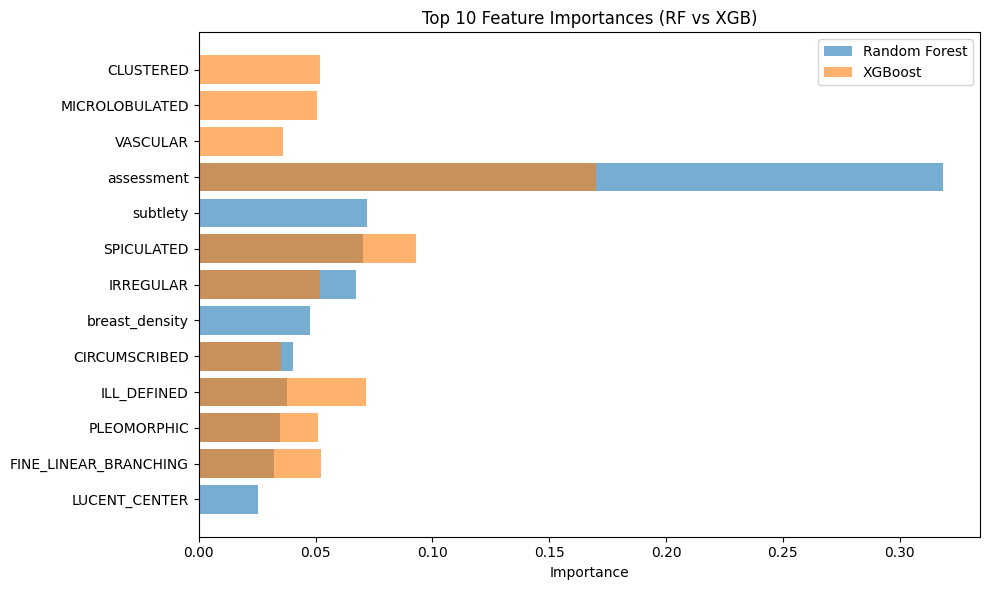

In [134]:
plt.figure(figsize=(10, 6))
plt.barh(features[indices_rf[:10]][::-1], importances_rf[indices_rf[:10]][::-1], alpha=0.6, label='Random Forest')
plt.barh(features[indices_xgb[:10]][::-1], importances_xgb[indices_xgb[:10]][::-1], alpha=0.6, label='XGBoost')
plt.title('Top 10 Feature Importances (RF vs XGB)')
plt.xlabel('Importance')
plt.legend()
plt.tight_layout()
plt.show()

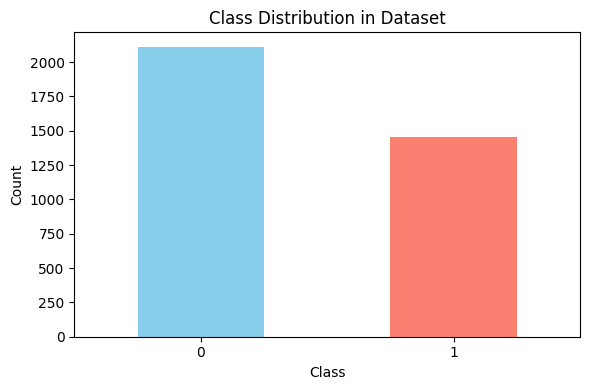

In [135]:
# visualizing the imbalance in the dataset
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


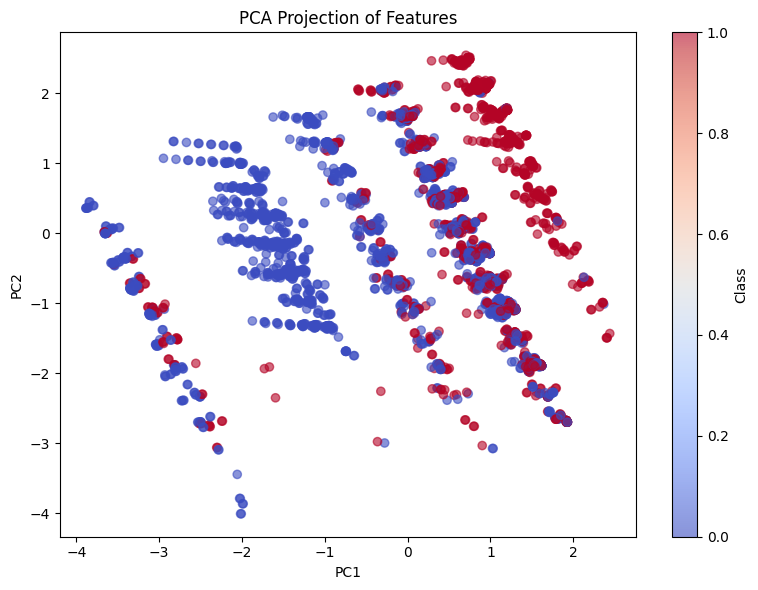

In [137]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('PCA Projection of Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Class')
plt.tight_layout()
plt.show()
